In [26]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import folium
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin,sqrt


In [27]:
def haversine(lon1,lat1,lon2,lat2):
    lon1, lat1, lon2, lat2 = map(radians,[lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r 

In [28]:
data = pd.read_csv('GPS_data.csv')
data.head()

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


Preparing the data for calculating speed, acceleration and distance

In [29]:
lat = data['latitude']
lon = data['longitude']

data['dist'] = np.zeros(lat.shape[0])
data['time_diff'] = np.zeros(lat.shape[0])

for i in range(lat.shape[0]-1):
    data['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1]) * 1000
    data['time_diff'][i] = data['seconds_elapsed'][i+1] - data['seconds_elapsed'][i]

data['dist'][0] = 0
data['total_dist'] = data['dist'].cumsum()
data['velocity'] = data['dist'] / data['time_diff']
data['acceleration'] = (data['velocity'].diff()) / (data['seconds_elapsed'].diff())

C:\Users\bhand\AppData\Local\Temp\ipykernel_21712\165571946.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1]) * 1000
C:\Users\bhand\AppData\Local\Temp\ipykernel_21712\16557194

Visualizing in the folium map

In [30]:
location_frame = data[['latitude', 'longitude']]
location_list = location_frame.values.tolist()

ave_lat = np.mean(location_list, axis=0)[0]
ave_lon = np.mean(location_list, axis=0)[1]

# Folium map creation
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=20)

folium.PolyLine(location_list, color="red", weight=2.2, opacity=1).add_to(my_map)

my_map

Calcuating average speed and total distance

In [31]:
print("Average speed is ", data['velocity'].mean(), "m/s")
print("Total distance traveled is ", data['total_dist'].iloc[-1], "m")
data.head()

Average speed is  1.6782391458590495 m/s
Total distance traveled is  215.14092455483328 m


,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,total_dist,velocity,acceleration
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000,0.000000,NaN
1,1,5.339879,25.516227,65.071393,0.810401,0.340121,0.810401,2.382686,1.456220
2,2,5.680000,25.516240,65.071398,1.171329,0.631351,1.981730,1.855274,-1.550663
3,3,6.311351,25.516264,65.071394,0.229699,1.012578,2.211429,0.226845,-2.579275
4,4,7.323929,25.516267,65.071396,0.722069,1.005767,2.933498,0.717928,0.484982


Creating valocity graph from coordintates

Text(0.5, 0, 'Time')

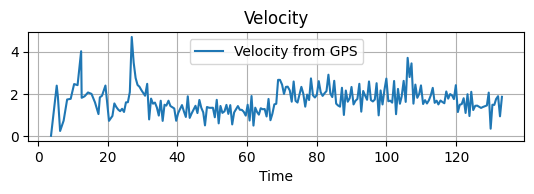

In [32]:
#For velocity
plt.subplot(3, 1, 1)
plt.plot(data['seconds_elapsed'], data['velocity'])
plt.legend(['Velocity from GPS'])
plt.grid()
plt.title('Velocity')
plt.xlabel('Time')

Creating distance graph

Text(0, 0.5, 'Total Distance m')

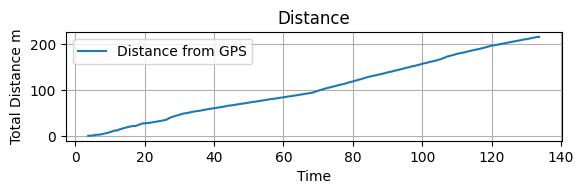

In [33]:
#For distance from GPS
plt.subplot(3,1,2)
plt.plot(data['seconds_elapsed'],data['total_dist'])
plt.legend(['Distance from GPS'])
plt.grid()
plt.title('Distance')
plt.xlabel('Time')
plt.ylabel('Total Distance m')

Creating the accelaration graph

Text(0, 0.5, 'Acceleration [m/s^2]')

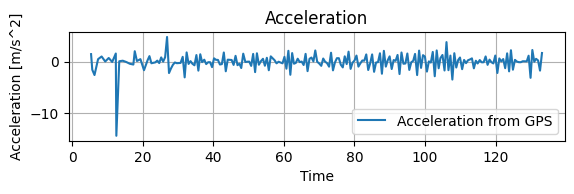

In [42]:
#For acceleration from GPS
plt.subplot(3, 1, 3)
plt.plot(data['seconds_elapsed'], data['acceleration'])
plt.legend(['Acceleration from GPS'])
plt.grid()
plt.title('Acceleration')
plt.xlabel('Time')
plt.ylabel('Acceleration [m/s^2]')

Importing Acceleration data file

In [45]:
data_acc = pd.read_csv('Acceleration_data.csv')
data_acc.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


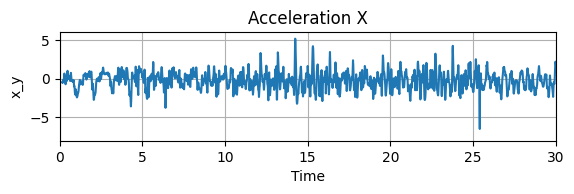

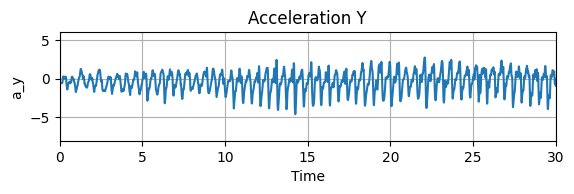

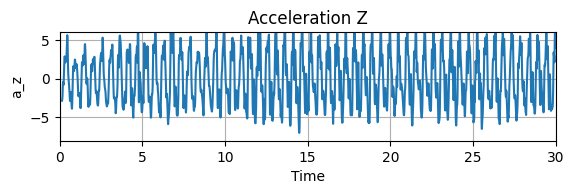

In [46]:
plt.subplot(3,1,1)
plt.plot(data_acc['seconds_elapsed'],data_acc['x'])
plt.grid()
plt.title('Acceleration X')
plt.xlabel('Time')
plt.ylabel('x_y')
plt.axis([0, 30, -8, 6])
plt.show()

plt.subplot(3,1,2)
plt.plot(data_acc['seconds_elapsed'],data_acc['y'])
plt.grid()
plt.title('Acceleration Y')
plt.xlabel('Time')
plt.ylabel('a_y')
plt.axis([0, 30, -8, 6])
plt.show()

plt.subplot(3,1,3)
plt.plot(data_acc['seconds_elapsed'],data_acc['z'])
plt.grid()
plt.title('Acceleration Z')
plt.xlabel('Time')
plt.ylabel('a_z')
plt.axis([0, 30, -8, 6])
plt.show()

In [47]:
a_x = data_acc['x'].abs().sum()
a_y = data_acc['y'].abs().sum()
a_z = data_acc['z'].abs().sum()

print("The total acceleration in x direction is ", a_x, "m/s^2")
print("The total acceleration in y direction is ", a_y, "m/s^2")
print("The total acceleration in z direction is ", a_z, "m/s^2")

The total acceleration in x direction is  9603.94380273996 m/s^2
The total acceleration in y direction is  13128.732843633741 m/s^2
The total acceleration in z direction is  25602.166787147522 m/s^2


Creating the function for butter_lowpass_filter and butter_highpass_filter. We will calculate the number or steps from z component.

In [48]:
# ! pip install scipy  
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff,btype='low', analog=False)
    z = filtfilt(b, a, data)
    return z

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff,btype='high', analog=False)
    z = filtfilt(b, a, data)
    return z

The number of steps is: 255.5


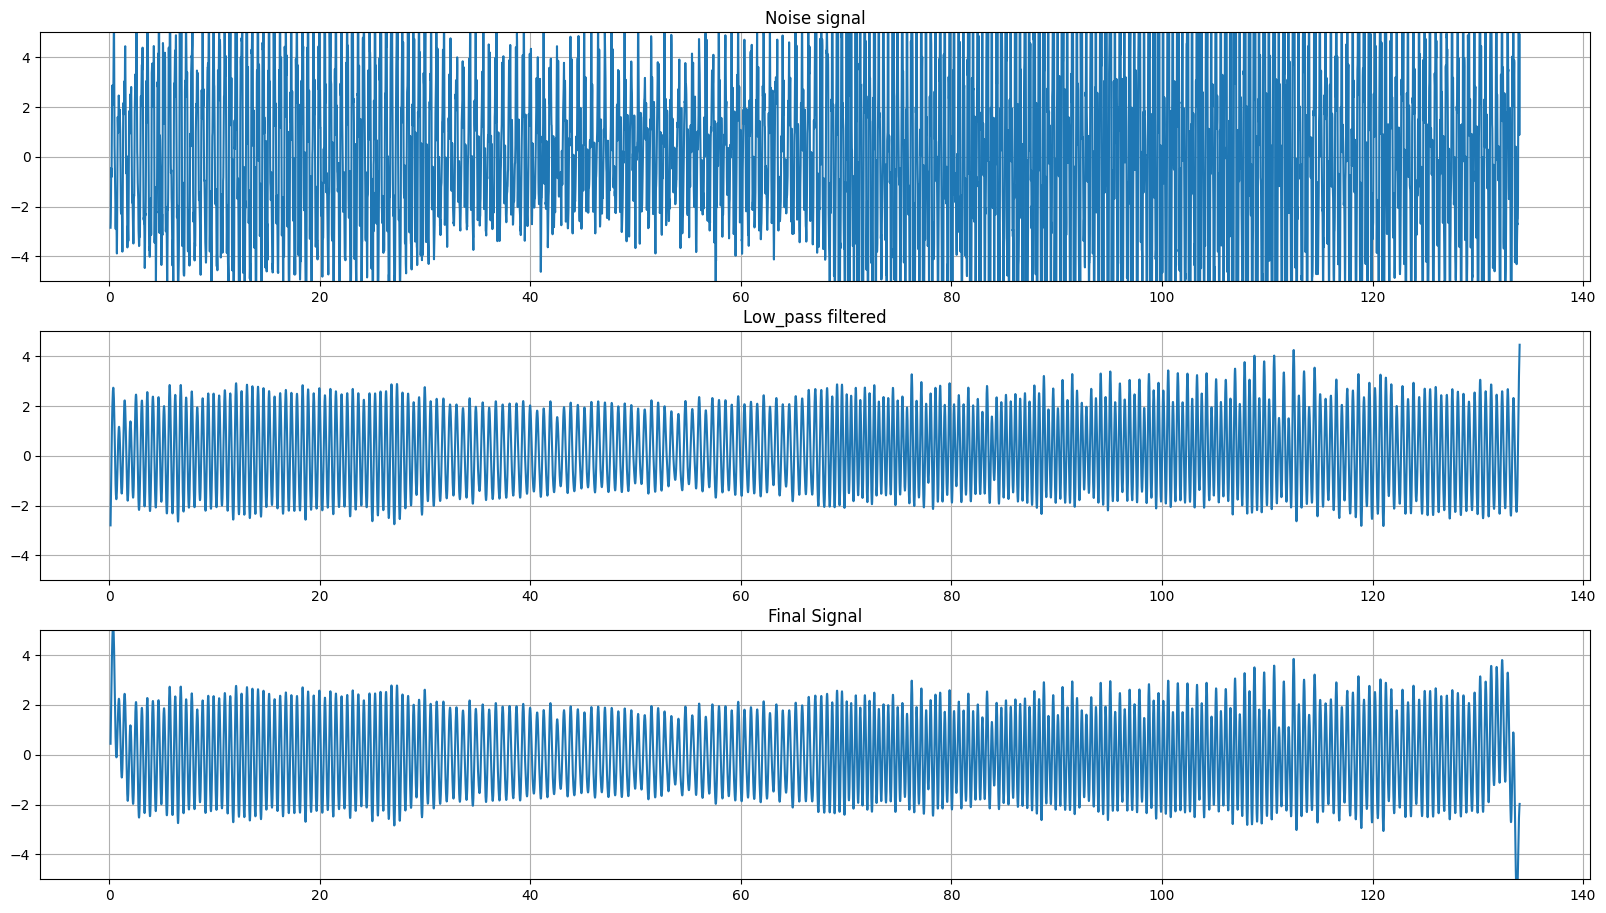

In [49]:
noise_signal = data_acc['z']
time = data_acc['seconds_elapsed']
order = 2
dt = (time[len(time) - 1] - time[0])/len(time)

fs = 1/dt
nyq = 0.5 * fs
cutoff_H = 1/5
cutoff_L = 1/0.5

lowpass_filtered = butter_lowpass_filter(noise_signal, cutoff_L, fs, nyq, order)
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order)


plt.figure(figsize=(20,11))
plt.subplot(3,1,1)
plt.plot(time,noise_signal)
plt.title('Noise signal')
plt.grid()
plt.ylim(-5,5)

plt.subplot(3,1,2)
plt.plot(time,lowpass_filtered)
plt.title('Low_pass filtered')
plt.grid()
plt.ylim(-5,5)

plt.subplot(3,1,3)
plt.plot(time,final_signal)
plt.title('Final Signal')
plt.grid()
plt.ylim(-5,5)

stepdata = final_signal
steps = 0
for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1] < 0:
        steps = steps + 0.5
print('The number of steps is:', steps)

In [50]:
data_acc['magnitude'] = np.sqrt(data_acc['x']**2 + data_acc['y']**2 + data_acc['z']**2)

Comparing the calculated signal and the observed signal after filtering is completed. Here we can see that the two signal are almost overlapping with each other with a very little differences. The differences occurs because of the device we are using for measurement. Otherwise, we can say that although the calculated and observed speed are not hundred percent identical, they are very close.

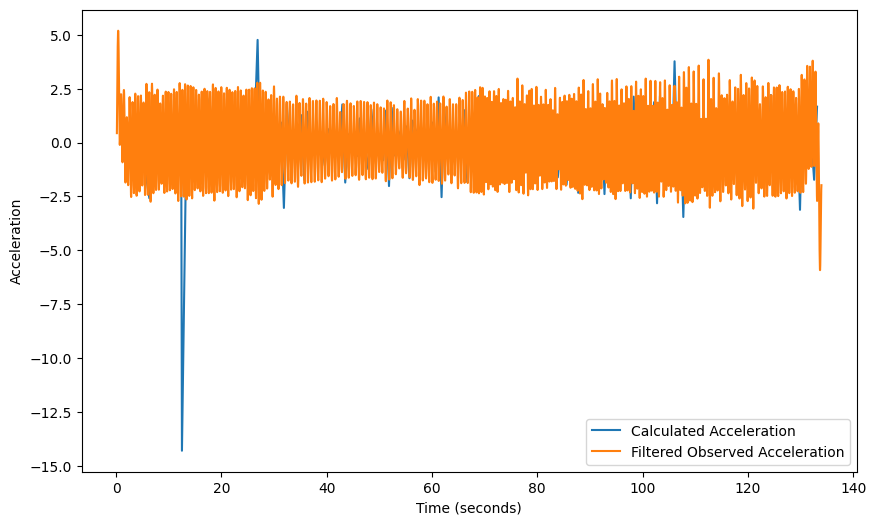

In [51]:
plt.figure(figsize=(10, 6))
data_acc['final_signal'] = final_signal

plt.plot(data['seconds_elapsed'], data['acceleration'], label='Calculated Acceleration')
plt.plot(data_acc['seconds_elapsed'], data_acc['final_signal'], label='Filtered Observed Acceleration')

plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration')
plt.legend()

plt.show()